# <span style="color:red">SpringBoard - Ultimate Challenge</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from pandas.io.json import json_normalize

import warnings

warnings.warn("deprecated", DeprecationWarning)

warnings.filterwarnings("ignore")

/Users/Murat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: deprecated
  # Remove the CWD from sys.path while we load stuff.


In [2]:
# load as Pandas dataframe

login_df = pd.read_json('logins.json')

login_df.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [4]:
# Data Frame quick look

login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## <span style="color:red">Part 1 - Exploratory Data Analysis</span>

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

1. Aggregate these login counts based on 15 minute time intervals

2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

3. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


In [6]:
# add a column with constant 1. I made this to use resampling function

login_df['count'] = 1

login_df.head(3)

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1


In [7]:
login_df.set_index('login_time', inplace=True)
login_df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
# Resamplin for 15 minutes

login_df_15T = login_df.resample('15T').sum()
login_df_15T.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
# Print beginning and end time 

print(login_df.index.min())
print(login_df.index.max())

1970-01-01 20:12:16
1970-04-13 18:57:38


## <span style = color:red > *Analysis* <span>

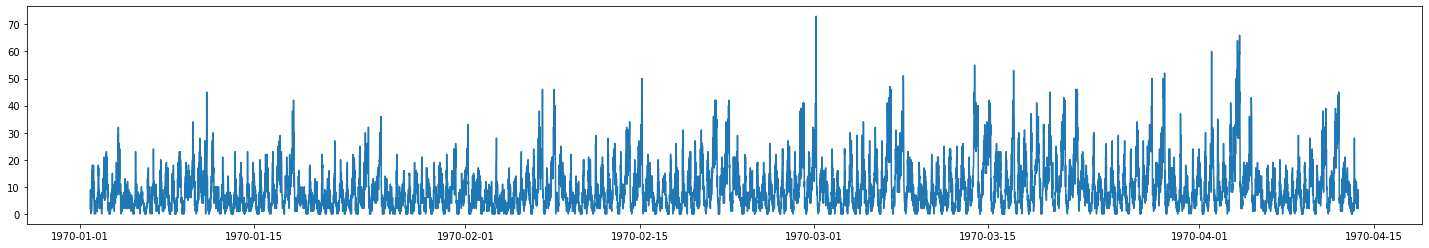

In [25]:
# Plot logins(total logins at each 15 minutes time frame) vs time

plt.figure(figsize=(25,4))
plt.plot(login_df_15T)

### It seem there are different patterns. At first look I can say there is a weekly period.

## <span style = color:red > Aggregate in different time frames <span>

## <span style = color:red > *Hourly* <span>

In [29]:
a = 4 * 24 # (numnber of 15 minutes time frames per day)
a

96

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1, 'Friday')

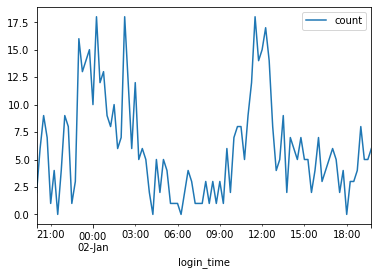

In [33]:
# Plot one day

print(type(login_df_15T))

login_df_15T[a*0:a*1].plot(); axes[0].set_title(login_df_15T.index[1*a].strftime('%A'))

Text(0.5, 1.0, 'Thursday')

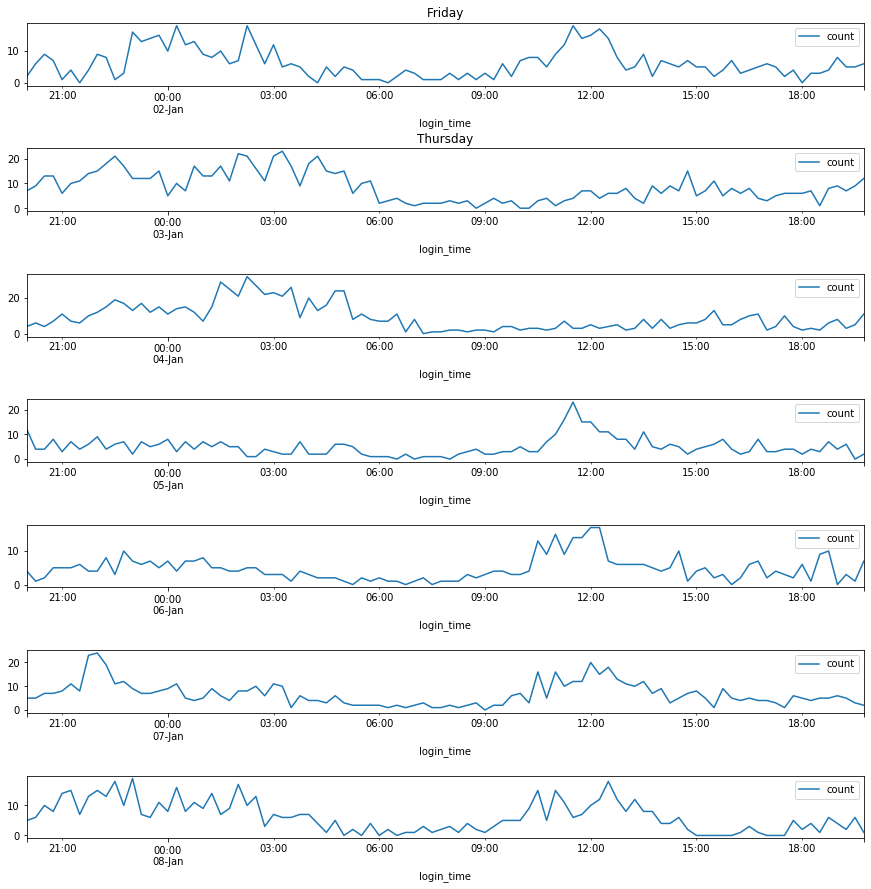

In [34]:
# I plot logins per each day 

fig, axes = plt.subplots(nrows=7, ncols=1,figsize=(15,15))

plt.subplots_adjust(wspace=0.5, hspace=1)

login_df_15T[a*0:a*1].plot(ax=axes[0]); axes[0].set_title(login_df_15T.index[1*a].strftime('%A'))
login_df_15T[a*1:a*2].plot(ax=axes[1]); axes[1].set_title(login_df_15T.index[2*a].strftime('%A'))
login_df_15T[a*2:a*3].plot(ax=axes[2]); axes[1].set_title(login_df_15T.index[3*a].strftime('%A'))
login_df_15T[a*3:a*4].plot(ax=axes[3]); axes[1].set_title(login_df_15T.index[4*a].strftime('%A'))
login_df_15T[a*4:a*5].plot(ax=axes[4]); axes[1].set_title(login_df_15T.index[5*a].strftime('%A'))
login_df_15T[a*5:a*6].plot(ax=axes[5]); axes[1].set_title(login_df_15T.index[6*a].strftime('%A'))
login_df_15T[a*6:a*7].plot(ax=axes[6]); axes[1].set_title(login_df_15T.index[7*a].strftime('%A'))


## <span style = color:red > *Daily* <span>

In [35]:
# Resampling for one day, add a feature to implicit which day of week

login_df_1D = login_df.resample('1D').sum()
login_df_1D['dayofweek'] = login_df_1D.index.dayofweek
login_df_1D.head(3)

,count,dayofweek
login_time,,
1970-01-01,112,3
1970-01-02,681,4
1970-01-03,793,5


In [39]:
# sample

print(login_df_1D.index[0])

login_df_1D.index[0].strftime('%A')

1970-01-01 00:00:00


'Thursday'

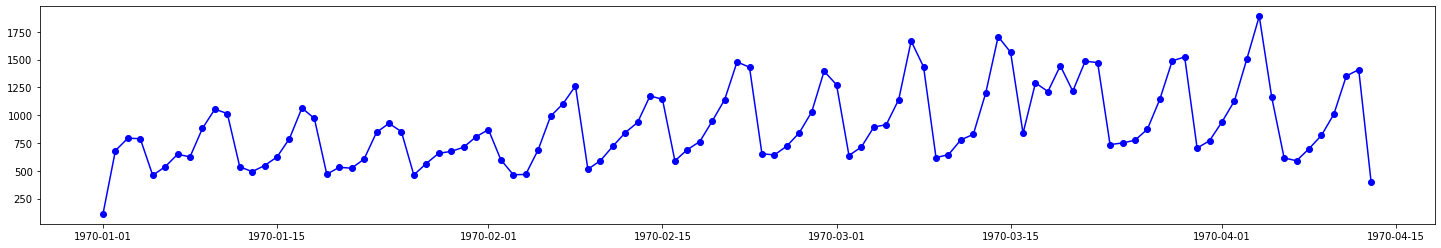

In [40]:
# Plot whole graph for daily

x  = login_df_1D.index
y  = login_df_1D['count']
yy = login_df_1D['dayofweek']

plt.figure(figsize=(25,4))
plt.plot(x,y,'bo-')

## <span style = color:red > *Find peak values correspond to which day of week* <span>

In [43]:
import math

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

number_of_weeks = round_down(len(login_df_1D)/7,0)

print("there are ", number_of_weeks, "weeks")

there are  14.0 weeks


In [44]:
number_of_weeks = round_down(len(login_df_1D)/7,0)

# finding max count at each week

for i in range(int(number_of_weeks)):
    
    #week_df = login_df_1D[i*7:(i+1)*7]
    
    #print(week_df[week_df['count'] == week_df['count'].max()])

    print(login_df_1D[login_df_1D['count'] == login_df_1D.iloc[i*7:(i+1)*7,0].max()])
    print(login_df_1D[login_df_1D['count'] == login_df_1D.iloc[i*7:(i+1)*7,0].max()].index[0].strftime('%A'))

            count  dayofweek
login_time                  
1970-01-03    793          5
Saturday
            count  dayofweek
login_time                  
1970-01-10   1054          5
Saturday
            count  dayofweek
login_time                  
1970-01-17   1064          5
Saturday
            count  dayofweek
login_time                  
1970-01-24    926          5
Saturday
            count  dayofweek
login_time                  
1970-02-01    870          6
Sunday
            count  dayofweek
login_time                  
1970-02-08   1262          6
Sunday
            count  dayofweek
login_time                  
1970-02-14   1173          5
Saturday
            count  dayofweek
login_time                  
1970-02-21   1479          5
Saturday
            count  dayofweek
login_time                  
1970-02-28   1395          5
Saturday
            count  dayofweek
login_time                  
1970-03-07   1666          5
Saturday
            count  dayofweek
login_time     

Each week Sunday(6) or Saturaday(5) is the peak day. Sunday is only 3 times peak day. 

## <span style = color:red > *Weekly* <span>

In [45]:
# Resampling for one week

login_df_1W = login_df.resample('1W').sum()
login_df_1W.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


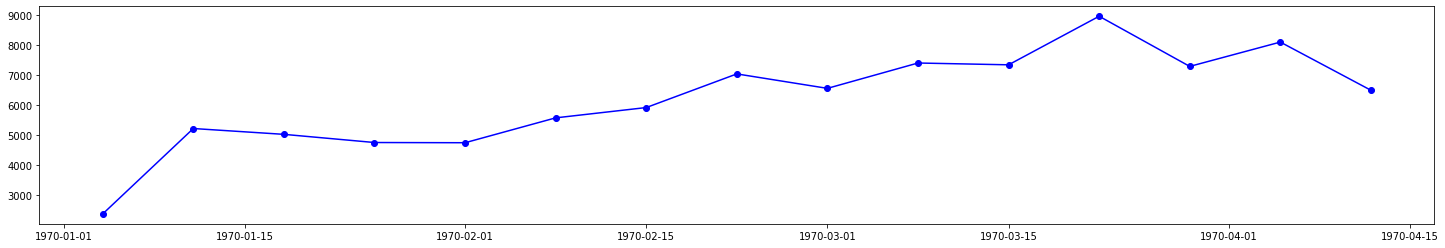

In [46]:
# plot weekly counts

plt.figure(figsize=(25,4))
plt.plot(login_df_1W[0:-1],'bo-')

We can see that total logins per week are increased from the first week of June to second week of April

## <span style="color:red">Part 2 - Experiment and metrics design</span>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the
    observation

    c. how you would interpret the results and provide recommendations to the city
    operations team along with any caveats.

### My Proposal

1. I will compare activities before and after experiment. It seems weekends are always busy for both cities. So I will compare their own activities during weekdays.

If Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day, after experiment this should be changed. I expect more night activity at Ultimate Metropolis and more day activity at 
Gotham. 

2. I will do A/B test. Which means before experiment and after experiment. There are two ways to do it.

    a. Keep record of all activities for one year before announcement and 1 year after announcement and compare  statistics.
    
    b. We inform only selected drivers about free toll gate and compare statistics who know it or who does not know it
    
    For statistics, users' location information will be used. How much time do they spend in different cities?
    
   we calculate for each user: 
   
       Spend time in Gotham / Spend time in Metropolis * 100
       
       Spend time in Metropolis / Spend time in Gotham * 100
       
    After experiment these two distribution will be changed.
    
    If experiment is failed distributions will not change. 
    
    We use z test to compare distributions before and after experiment

## <span style="color:red">Part 3 - Predictive Modelling</span>

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [47]:
# load as Pandas dataframe

with open('ultimate_data_challenge.json') as f:
    
    data = json.load(f)

ultimate_df = pd.DataFrame(data)

ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### Data description

city: city this user signed up in

phone: primary device for this user

signup_date: date of account registration; in the form ‘YYYYMMDD’

last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

avg_dist: the average distance in miles per trip taken in the first 30 days after signup

avg_rating_by_driver: the rider’s average rating over all of their trips

avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

surge_pct: the percent of trips taken with surge multiplier > 1

avg_surge: The average surge multiplier over all of this user’s trips

trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

weekday_pct: the percent of the user’s trips occurring during a weekday

In [48]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


avg_rating_by_driver, avg_rating_of_driver, phone has missing values

In [49]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [51]:
# Find null values

print(ultimate_df.isnull().sum())

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [52]:
# while avg_rating_by_driver is not null, how many null values

print(ultimate_df[ultimate_df.avg_rating_by_driver.notna()].isnull().sum())

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8055
avg_surge                    0
city                         0
last_trip_date               0
phone                      393
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


I can delete missing values of avg_rating_by_driver and phone because of relatively small number of null values 

I might delete avg_rating_of_driver feature or fill the missing values, I will decide this after EDA

## First find active users

In [53]:
# last trip date or last data taken

last_day = ultimate_df.last_trip_date.max()

last_day_time_stamp = pd.Timestamp(last_day)

last_day_time_stamp

Timestamp('2014-07-01 00:00:00')

In [55]:
# 30 days prior to last day of the data taken

lm = last_day_time_stamp - pd.Timedelta('30D')
lm

Timestamp('2014-06-01 00:00:00')

In [58]:
active_users = []

for i in range(len(ultimate_df)):
    
    last_trip = pd.Timestamp(ultimate_df.last_trip_date[i]) #last trip date of the rider
    
    if lm <= last_trip:
        
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    
    else:
        active_users.append([0])

In [60]:
print(type(active_users))

<class 'list'>


In [62]:
# length of active_users list

len(active_users)

50000

In [63]:
# How many users are active acording to definition

active_users_df = pd.DataFrame(active_users,columns = ['active_users'])

active_users_df['active_users'].value_counts()

0    31196
1    18804
Name: active_users, dtype: int64

Active and nonactive users are not 50/50 but I can say that it is close and machine can learn both of them 

In [65]:
# add active_user feature to ultimate_df dataframe

ultimate_df['active_user'] = active_users_df['active_users']

ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [66]:
# Drop avg_rating_by_driver and phone features

ultimate_df = ultimate_df.dropna(subset=['avg_rating_by_driver','phone'])

print(ultimate_df.shape)

print(ultimate_df.isnull().sum())

(49406, 13)
avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      7961
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
active_user                  0
dtype: int64


## <span style = color:red > *EDA* <span>

In [67]:
#Import package

import seaborn as sns

## <span style = color:red > *city* <span>

In [68]:
pd.crosstab(ultimate_df.city, ultimate_df.active_user)

active_user,0,1
city,,
Astapor,12160,4195
King's Landing,3726,6301
Winterfell,14885,8139


## It seems city is an important feature we need to use it. Active users are most probably from King's Landing.

## <span style = color:red > *phone* <span>

In [69]:
pd.crosstab(ultimate_df.phone, ultimate_df.active_user)

active_user,0,1
phone,,
Android,11821,3139
iPhone,18950,15496


## It seems phone is an important feature we need to use it. Active users are most probably using iphone.

## <span style = color:red > *ultimate_black_user* <span>

In [70]:
pd.crosstab(ultimate_df['active_user'], ultimate_df['ultimate_black_user'])

ultimate_black_user,False,True
active_user,,
0,21590,9181
1,9237,9398


## It seems phone is an important feature we need to use it. Active users are most probably ultimate_black_user.

## <span style = color:red > *avg_dist* <span>

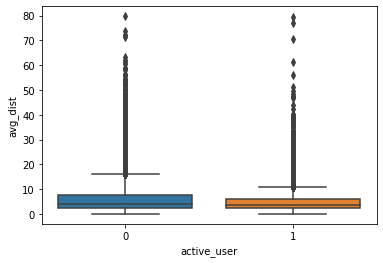

In [71]:
sns.boxplot(x=ultimate_df['active_user'], y=ultimate_df['avg_dist'])

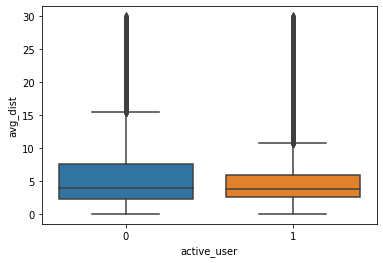

In [34]:
sns.boxplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.avg_dist<30].avg_dist)

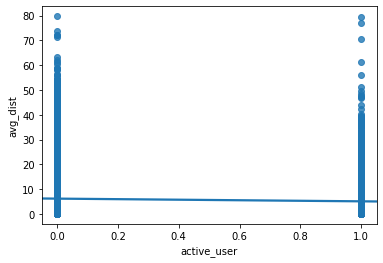

In [35]:
sns.regplot(x="active_user", y="avg_dist",data=ultimate_df)

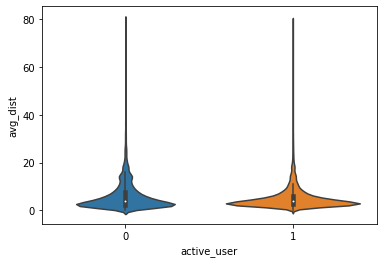

In [36]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df['avg_dist'])

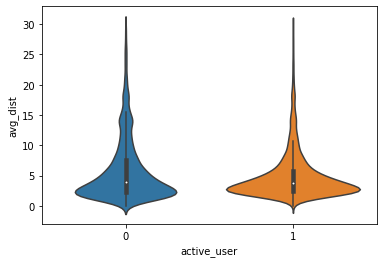

In [37]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.avg_dist<30].avg_dist)

## Most probably active users' average distance is bigger

## <span style = color:red > *avg_rating_by_driver* <span>

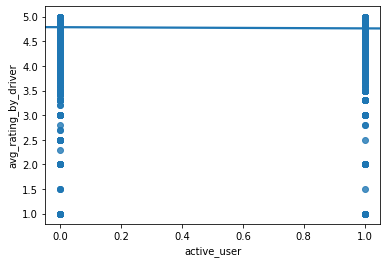

In [38]:
sns.regplot(x=ultimate_df['active_user'], y=ultimate_df.avg_rating_by_driver)

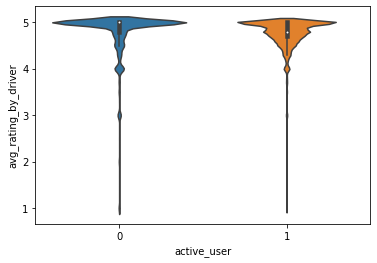

In [39]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df.avg_rating_by_driver)

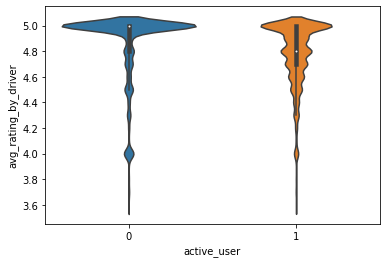

In [40]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.avg_rating_by_driver>3.5].avg_rating_by_driver)

## <span style = color:red > *avg_rating_of_driver* <span>

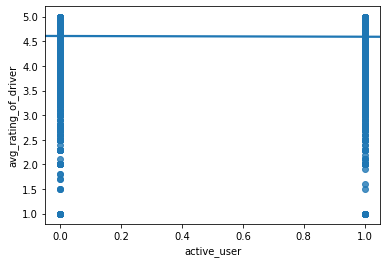

In [41]:
sns.regplot(x=ultimate_df['active_user'], y=ultimate_df.avg_rating_of_driver)

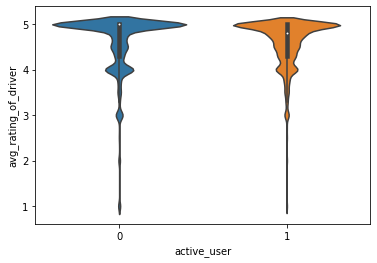

In [42]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df.avg_rating_of_driver)

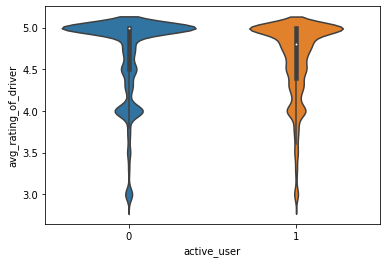

In [43]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.avg_rating_of_driver>2.8].avg_rating_of_driver)

From plot I can say that avg_rating_of_driver feaature is not a important feature, and it has mor than 8000 missing values so I decide not to use this feature

In [44]:
ultimate_df = ultimate_df.drop(columns=['avg_rating_of_driver'])

ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


## <span style = color:red > *avg_surge* <span>

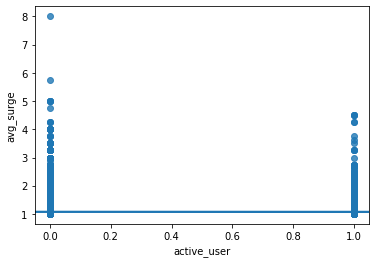

In [45]:
sns.regplot(x=ultimate_df['active_user'], y=ultimate_df.avg_surge)

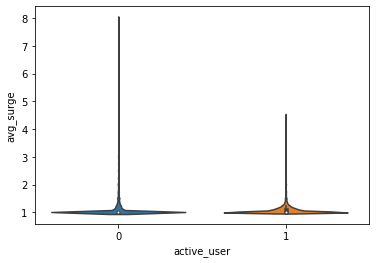

In [46]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df.avg_surge)

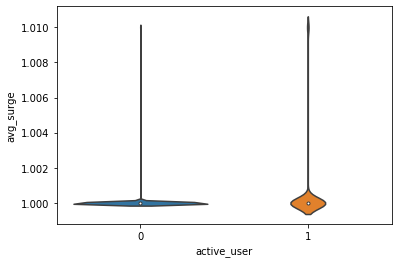

In [78]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.avg_surge<1.02].avg_surge)

## active users' surge is most probably one but, active users have different surge values

## <span style = color:red > *surge_pct* <span>

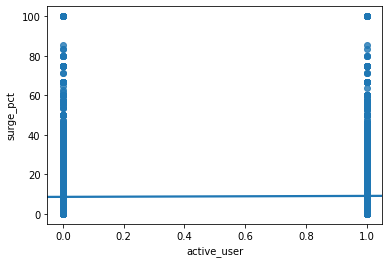

In [48]:
sns.regplot(x=ultimate_df['active_user'], y=ultimate_df.surge_pct)

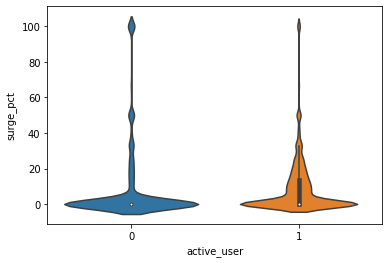

In [49]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df.surge_pct)

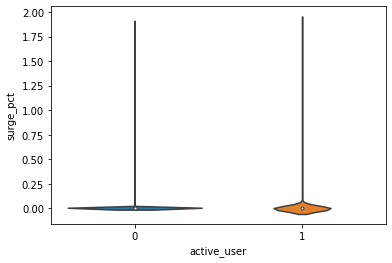

In [81]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.surge_pct<2].surge_pct)

## <span style = color:red > *trips_in_first_30_days* <span>

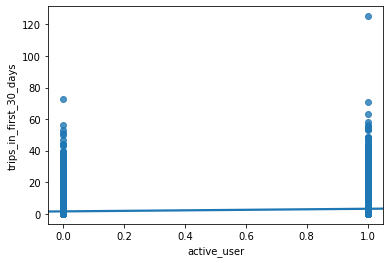

In [51]:
sns.regplot(x=ultimate_df['active_user'], y=ultimate_df.trips_in_first_30_days)

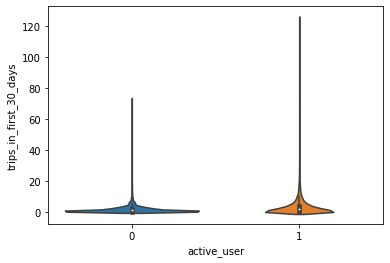

In [52]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df.trips_in_first_30_days)

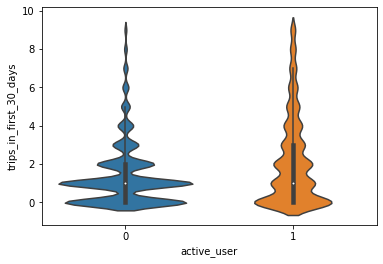

In [53]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df[ultimate_df.trips_in_first_30_days<10].trips_in_first_30_days)

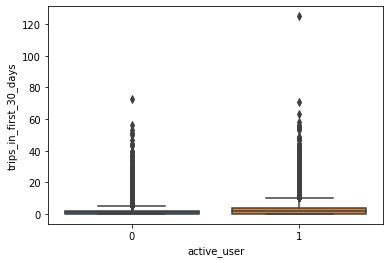

In [54]:
sns.boxplot(x=ultimate_df['active_user'], y=ultimate_df.trips_in_first_30_days)

## <span style = color:red > *weekday_pct* <span>

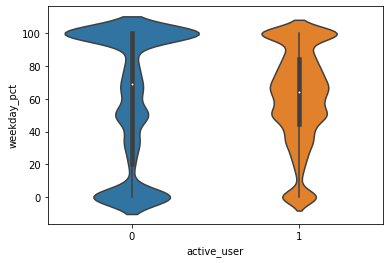

In [55]:
sns.violinplot(x=ultimate_df['active_user'], y=ultimate_df.weekday_pct)

# <span style = color:red > *Predictive Models* <span>

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [57]:
feature_num = len(ultimate_df.columns)
feature_num

12

In [58]:
for (columnName, columnData) in ultimate_df.iteritems():
    
    print('Colunm Name : ', columnName)
    
    print('Column Contents : ', columnData.value_counts().count())

Colunm Name :  avg_dist
Column Contents :  2899
Colunm Name :  avg_rating_by_driver
Column Contents :  27
Colunm Name :  avg_surge
Column Contents :  115
Colunm Name :  city
Column Contents :  3
Colunm Name :  last_trip_date
Column Contents :  182
Colunm Name :  phone
Column Contents :  2
Colunm Name :  signup_date
Column Contents :  31
Colunm Name :  surge_pct
Column Contents :  367
Colunm Name :  trips_in_first_30_days
Column Contents :  59
Colunm Name :  ultimate_black_user
Column Contents :  2
Colunm Name :  weekday_pct
Column Contents :  664
Colunm Name :  active_user
Column Contents :  2


In [59]:
def categorical_featrues(df, value=2):
    
    for (columnName, columnData) in ultimate_df.iteritems():
        
        if columnData.value_counts().count() <= value:
        
            print('Colunm Name :', columnName, ', number of unique values: ',columnData.value_counts().count())

In [60]:
categorical_featrues(ultimate_df,3)

Colunm Name : city , number of unique values:  3
Colunm Name : phone , number of unique values:  2
Colunm Name : ultimate_black_user , number of unique values:  2
Colunm Name : active_user , number of unique values:  2


In [61]:
ultimate_df[['city','phone','ultimate_black_user']].dtypes

city                   object
phone                  object
ultimate_black_user      bool
dtype: object

In [62]:
ultimate_df["city"]                = ultimate_df["city"].astype('category')
ultimate_df["phone"]               = ultimate_df["phone"].astype('category')
ultimate_df["ultimate_black_user"] = ultimate_df["ultimate_black_user"].astype('category')
ultimate_df[['city','phone','ultimate_black_user']].dtypes

city                   category
phone                  category
ultimate_black_user    category
dtype: object

In [63]:
ultimate_df["city"] = ultimate_df["city"].cat.codes

ultimate_df["phone"] = ultimate_df["phone"].cat.codes

ultimate_df["ultimate_black_user"] = ultimate_df["ultimate_black_user"].cat.codes

In [64]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,1.10,1,2014-06-17,1,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,1.00,0,2014-05-05,0,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,1.00,0,2014-01-07,1,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,1.14,1,2014-06-29,1,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,1.19,2,2014-03-15,0,2014-01-27,11.8,14,0,82.4,0


In [65]:
# splitting into features and target

y = ultimate_df['active_user']

X = ultimate_df[['avg_dist', 'avg_rating_by_driver','avg_surge','city','phone','surge_pct',
                 'trips_in_first_30_days','ultimate_black_user','weekday_pct']]

In [66]:
X.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_surge                 float64
city                         int8
phone                        int8
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          int8
weekday_pct               float64
dtype: object

In [67]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
model_logreg = LogisticRegression()

# Fit the classifier to the training data
model_logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = model_logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10485  1872]
 [ 4221  3185]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77     12357
           1       0.63      0.43      0.51      7406

    accuracy                           0.69     19763
   macro avg       0.67      0.64      0.64     19763
weighted avg       0.68      0.69      0.68     19763



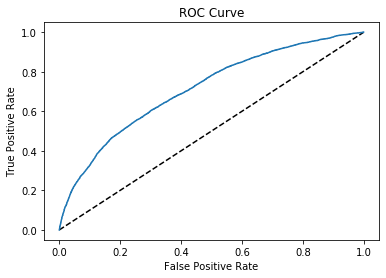

In [68]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(model_logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7128936617403775
AUC scores computed using 5-fold cross-validation: [0.71498935 0.71428074 0.7056647  0.71779045 0.72028195]


In [70]:
# Setup the hyperparameter grid

param_grid = [
              { 'C' : [0.01, 0.1, 1, 10,]}
              ]


# Instantiate the GridSearchCV object: lR_cv

LR_cv = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)

# Fit it to the data
LR_cv.fit(X,y)

# Print the tuned parameters and score

print("Tuned Logistic Regression Parameters: {}".format(LR_cv.best_params_)) 
print("Best score is {}".format(LR_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.6928915847215746
